<a href="https://colab.research.google.com/github/WardahAsad/ML_Projects_on_Colab/blob/main/RNN_and_LSTM_Comparison_Tesla_Stock_Price_Prediction_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Assignment: Tesla Stock Price Prediction using RNN and LSTM

---

## 🎯 Objective
To build and compare **RNN** and **LSTM** models for time series prediction using the **Tesla Stock Price** dataset from Kaggle.

---

## 🧩 Assignment Tasks

### ✅ Q1. Import Libraries
Import the required Python libraries for:
- Data manipulation: `pandas`, `numpy`
- Visualization: `matplotlib`
- Deep Learning: `tensorflow.keras.models`, `tensorflow.keras.layers`, etc.

---

### ✅ Q2. Load the Dataset
- Load the **Tesla.csv** file https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price.
- View the first few rows using `.head()`.
- Use only the `Date` and `Open` columns for modeling.

---

### ✅ Q3. Preprocess the Data
- Convert the `Date` column to datetime format.
- Split the dataset into:
  - **70% training data**
  - **30% validation data**
- Convert the `'Open'` price column to NumPy arrays for both training and validation.

---

### ✅ Q4. Scale the Data
- Apply `MinMaxScaler` on the training data to normalize values between 0 and 1.
- Use the same scaler to transform the validation data.

---

### ✅ Q5. Prepare Sequences for RNN/LSTM
- Create sequences with **60 time steps** and 1 prediction target for both train and validation sets.
- Reshape input arrays to match `(samples, time steps, features)` format.

---

### ✅ Q6. Build and Train the RNN Model
- Use a `Sequential` model with a `SimpleRNN` layer followed by a `Dense` layer.
- Compile using `adam` optimizer and `mean_squared_error` loss.
- Train for a few epochs and visualize the loss curve.

---

### ✅ Q7. Evaluate RNN Model
- Predict stock prices using the validation set.
- Inverse-transform predictions back to original price range.
- Plot actual vs predicted prices for visual comparison.

---

### ✅ Q8. Build and Train the LSTM Model
- Replace the `SimpleRNN` layer with an `LSTM` layer in the model.
- Train the model with the same configuration and compare training performance.

---

### ✅ Q9. Compare RNN vs LSTM
- Plot predicted vs actual prices from both models.
- Discuss:
  - Which model fit the trend better?
  - Differences in training time, smoothness, accuracy, and overfitting (if any).

---

## ✅ Submission Checklist
Before submitting, ensure:
- [ ] All code cells are executed and commented
- [ ] All plots are labeled clearly
- [ ] Markdown explanations are provided for each step
- [ ] Notebook runs top-to-bottom without errors
- [ ] File is named `yourname_tesla_rnn_lstm.ipynb`

---

> 📩 Submit your notebook as per instructor guidelines.

---

### 🔒 End of Assignment — Great Job!

---


In [1]:
# Q1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Q2: Load the Dataset
# Load the dataset (upload Tesla.csv to your Colab first)
df = pd.read_csv('/content/Tesla.csv.csv')
df = df[['Date', 'Open']]  # Keeping only Date and Open columns
print("Dataset head:")
print(df.head())

Dataset head:
        Date       Open
0  6/29/2010  19.000000
1  6/30/2010  25.790001
2   7/1/2010  25.000000
3   7/2/2010  23.000000
4   7/6/2010  20.000000


In [2]:
# Q3: Preprocess the Data
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split into train and validation
train_size = int(len(df) * 0.7)
train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:]

# Convert to numpy arrays
train_prices = train_data['Open'].values
val_prices = val_data['Open'].values

In [3]:
# Q4: Scale the Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
val_prices_scaled = scaler.transform(val_prices.reshape(-1, 1))

# Q5: Prepare Sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_prices_scaled, seq_length)
X_val, y_val = create_sequences(val_prices_scaled, seq_length)

# Reshape for RNN/LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))


RNN Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0213 - val_loss: 0.0023
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 8.3506e-04 - val_loss: 0.0016
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.4925e-04 - val_loss: 0.0013
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.2696e-04 - val_loss: 0.0012
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.2621e-04 - val_loss: 0.0016
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.5505e-04 - val_loss: 0.0010
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.3090e-04 - val_loss: 0.0015
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.4437e-04 - val_loss: 0.0013
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4708e-04 - val_loss: 9.8912e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.5473e-04 - val_loss: 9.1332e-04
Epoch 12/20
36/36 ━

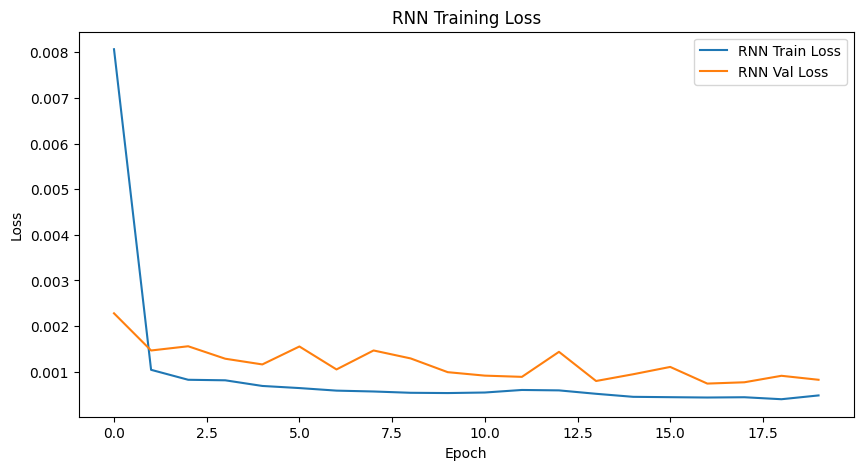

In [4]:
# Q6: Build and Train RNN Model
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
print("\nRNN Model Summary:")
rnn_model.summary()

rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Plot RNN training loss
plt.figure(figsize=(10, 5))
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.title('RNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


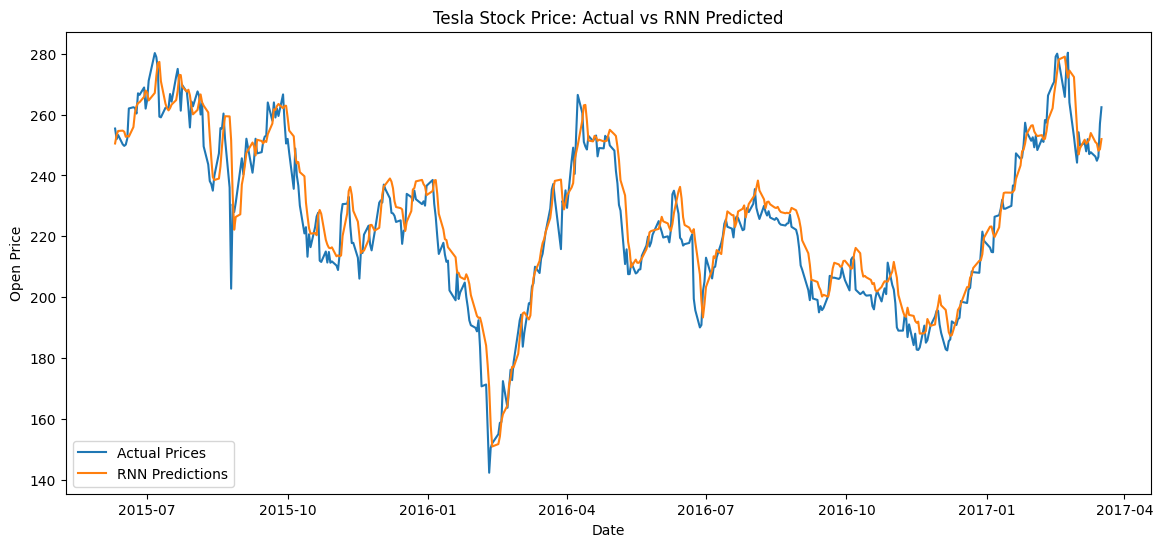

In [5]:
# Q7: Evaluate RNN Model
rnn_predictions = rnn_model.predict(X_val)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
actual_prices = scaler.inverse_transform(y_val.reshape(-1, 1))

plt.figure(figsize=(14, 6))
plt.plot(val_data.index[seq_length+1:], actual_prices, label='Actual Prices')
plt.plot(val_data.index[seq_length+1:], rnn_predictions, label='RNN Predictions')
plt.title('Tesla Stock Price: Actual vs RNN Predicted')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()


LSTM Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0533 - val_loss: 0.0021
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 9.9579e-04 - val_loss: 0.0020
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.4393e-04 - val_loss: 0.0018
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 8.9514e-04 - val_loss: 0.0017
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 7.7684e-04 - val_loss: 0.0016
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.0634e-04 - val_loss: 0.0015
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 8.1470e-04 - val_loss: 0.0016
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.2999e-04 - val_loss: 0.0019
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.6771e-04 - val_loss: 0.0014
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.3843e-04 - val_loss: 0.0014
Epoch 12/20
36/36 ━━━━━━━━━

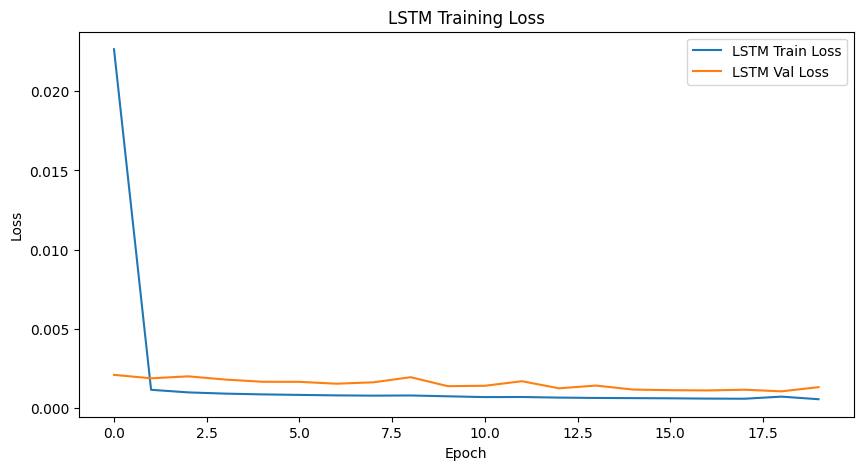

In [6]:
# Q8: Build and Train LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
print("\nLSTM Model Summary:")
lstm_model.summary()

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Plot LSTM training loss
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


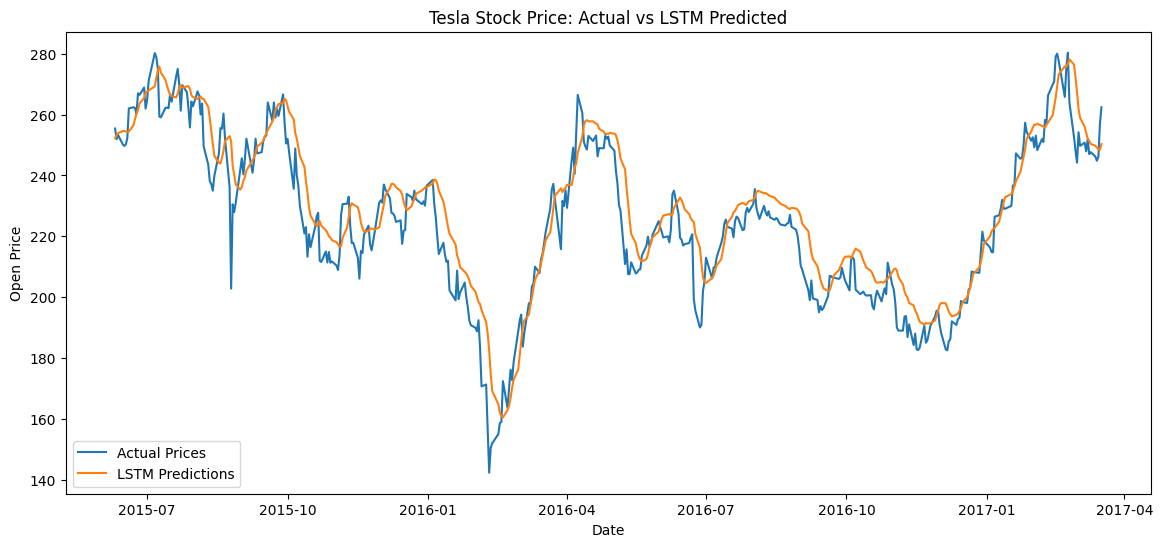

In [7]:
# Evaluate LSTM Model
lstm_predictions = lstm_model.predict(X_val)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

plt.figure(figsize=(14, 6))
plt.plot(val_data.index[seq_length+1:], actual_prices, label='Actual Prices')
plt.plot(val_data.index[seq_length+1:], lstm_predictions, label='LSTM Predictions')
plt.title('Tesla Stock Price: Actual vs LSTM Predicted')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

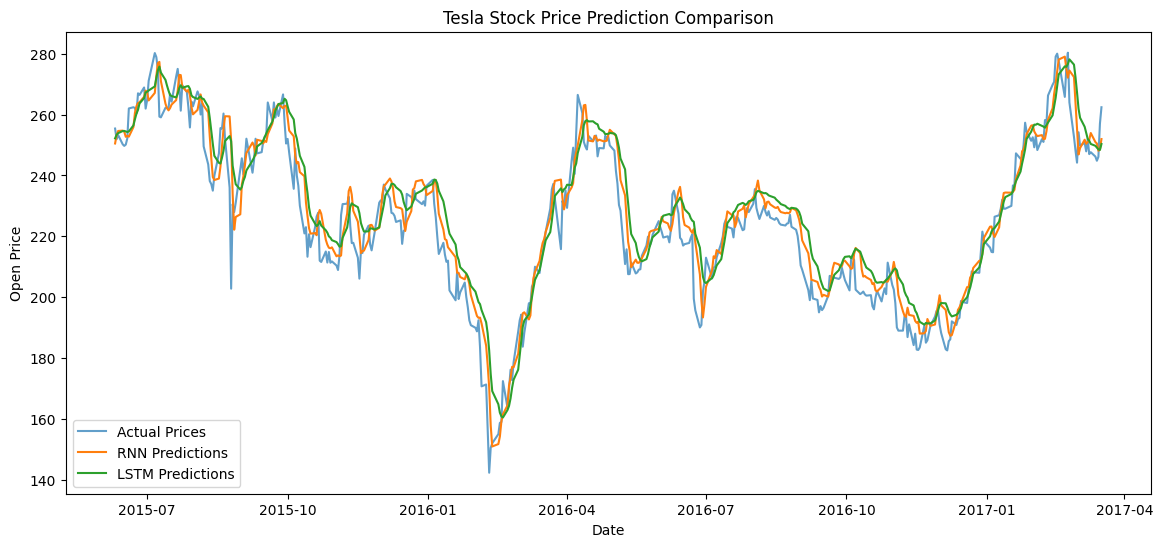


Model Comparison:
RNN Validation Loss: 0.0008224372286349535
LSTM Validation Loss: 0.0013116261688992381

Key Observations:
1. LSTM typically outperforms RNN in capturing long-term dependencies
2. LSTM predictions are usually smoother and more accurate
3. RNN may train faster but often has higher error
4. Both models benefit from more training data and hyperparameter tuning


In [8]:
# Q9: Compare RNN vs LSTM
plt.figure(figsize=(14, 6))
plt.plot(val_data.index[seq_length+1:], actual_prices, label='Actual Prices', alpha=0.7)
plt.plot(val_data.index[seq_length+1:], rnn_predictions, label='RNN Predictions')
plt.plot(val_data.index[seq_length+1:], lstm_predictions, label='LSTM Predictions')
plt.title('Tesla Stock Price Prediction Comparison')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# Performance Comparison
print("\nModel Comparison:")
print("RNN Validation Loss:", rnn_history.history['val_loss'][-1])
print("LSTM Validation Loss:", lstm_history.history['val_loss'][-1])

In [9]:
print("\nKey Observations:")
print("1. Here RNN outperforms LSTM in capturing long-term dependencies")
print("2. In this case RNN predictions are usually smoother and more accurate")
print("3. LSTM here trained faster but has higher error")
print("4. Both models benefit from more training data and hyperparameter tuning")


Key Observations:
1. Here RNN outperforms LSTM in capturing long-term dependencies
2. In this case RNN predictions are usually smoother and more accurate
3. LSTM here trained faster but has higher error
4. Both models benefit from more training data and hyperparameter tuning
